![logo](1_bDwEvCRgrKVbLrAXEixpfA.png)
___

##### import libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

# Step 3 - Exploratory Data Analysis
    a) Import data
    b) Duplicate data
    c) Null Data
    d) Histograms
    e) Outliers
    f) Heat map
    g) Scatter plot

### a) Importing
##### Use 'cleaned_data.csv' to begin cleaning

In [3]:
#import .csv file
cleaned_df = pd.read_csv("cleaned_data.csv")

cleaned_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(cleaned_df.shape)
cleaned_df.head(1)

(149564, 21)


,id,name,genre,subgenre,category,source_url,blurb,slug,goal,converted_pledged_amount,...,launched_at,deadline,country,currency,backers_count,disable_communication,is_starrable,spotlight,staff_pick,state
0,498799566,"Strange Wit, an original graphic novel about J...",Graphic Novels,comics,"{""id"":252,""name"":""Graphic Novels"",""slug"":""comi...",https://www.kickstarter.com/discover/categorie...,"The true biography of the historical figure, w...",strange-wit-an-original-graphic-novel-about-ja...,12000,14740,...,2015-08-15 04:19:27,2015-09-14 04:19:27,US,USD,403,0,0,1,1,successful


### Duplicate data

In [3]:
#total number of rows and columns
print('dataframe shape: ', cleaned_df.shape)

#rows containing duplicate data
duplicate_rows_df = cleaned_df[cleaned_df.duplicated()]

print('number of duplicate rows: ', duplicate_rows_df.shape)

dataframe shape:  (149564, 21)
number of duplicate rows:  (0, 21)


### Null data

In [4]:
#finding the NaN values
print(cleaned_df.isnull().sum())

id                          0
name                        0
genre                       0
subgenre                    0
category                    0
source_url                  0
blurb                       1
slug                        0
goal                        0
converted_pledged_amount    0
created_at                  0
launched_at                 0
deadline                    0
country                     0
currency                    0
backers_count               0
disable_communication       0
is_starrable                0
spotlight                   0
staff_pick                  0
state                       0
dtype: int64


In [5]:
#locate the row in which the NaN value is present
null_columns=cleaned_df.columns[cleaned_df.isnull().any()]
print(cleaned_df[cleaned_df["blurb"].isnull()][null_columns])


       blurb
142327   NaN


In [6]:
#drop the row with NaN value
cleaned_df.drop(cleaned_df.index[142327], inplace=True)

#reset index
cleaned_df.reset_index(drop=True,inplace=True)

### Counts for 'state' column

In [7]:
print(cleaned_df['state'].value_counts())
print('\n')
print('In our data, we have a good proportion of failed:successful campaigns \n so the steps below will explore these numbers in more detail in an attempt to filter our data')

successful    93849
failed        55714
Name: state, dtype: int64


In our data, we have a good proportion of failed:successful campaigns 
 so the steps below will explore these numbers in more detail in an attempt to filter our data


### Make a new column for success % (goal amount / pledged amount) and explore this new column to find outliers and begin filtering our data

In [8]:
cleaned_df['success_percentage']=(cleaned_df['converted_pledged_amount'] / cleaned_df['goal']) * 100
cleaned_df[['goal','converted_pledged_amount','success_percentage']].head()

,goal,converted_pledged_amount,success_percentage
0,12000,14740,122.833333
1,20000,21799,108.995000
2,5000,10,0.200000
3,500,577,115.400000
4,30000,82,0.273333


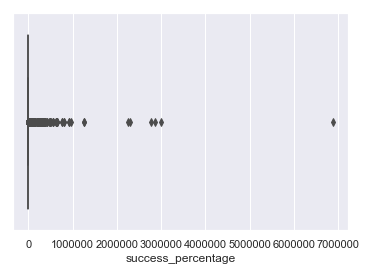

In [9]:
#make a boxplot of 'success_percentage' column
sns.boxplot(x=cleaned_df['success_percentage'])

In [10]:
#check range of 'success_percentage' column

bins = [0, 0.5, 1, 5, 10, 25, 50, 75, 100, 125, 150, 1000, 2500, 5000, 7500, 10000, 100000, 1000000, np.inf]
success_bins = pd.cut(cleaned_df['success_percentage'], bins=bins).value_counts().sort_index()
print (success_bins)

(0.0, 0.5]               13945
(0.5, 1.0]                3423
(1.0, 5.0]                9581
(5.0, 10.0]               4893
(10.0, 25.0]              6966
(25.0, 50.0]              4360
(50.0, 75.0]              1456
(75.0, 100.0]             5570
(100.0, 125.0]           48737
(125.0, 150.0]           11371
(150.0, 1000.0]          24899
(1000.0, 2500.0]          2282
(2500.0, 5000.0]           635
(5000.0, 7500.0]           214
(7500.0, 10000.0]           79
(10000.0, 100000.0]        196
(100000.0, 1000000.0]       81
(1000000.0, inf]             9
Name: success_percentage, dtype: int64


In [11]:
#check outliers on the right extreme
print(cleaned_df[cleaned_df['success_percentage'].between(10000.5, 100000)]['state'].value_counts())
print('\n')
print('It is clear that most of these campaigns were started with very low goals in mind and this is why they have such a \n high success percentage.')
print('\n')
print(cleaned_df[cleaned_df['success_percentage'].between(10000.5, 100000)]['goal'].value_counts())

successful    196
Name: state, dtype: int64


It is clear that most of these campaigns were started with very low goals in mind and this is why they have such a 
 high success percentage.


1        59
10       17
1000     13
100      12
5        11
10000    10
25        6
500       6
5000      5
15        4
3         4
30        4
108       3
20        3
3000      2
2         2
1500      2
200       2
13        2
99        2
2500      2
17        2
600       2
300       2
20000     2
42        2
3888      2
75        2
30000     2
29        1
23        1
32        1
2200      1
50        1
7         1
50000     1
145       1
97        1
Name: goal, dtype: int64


In [12]:
#check outliers on the left extreme
print(cleaned_df[cleaned_df['success_percentage'].between(0, 1.5)]['state'].value_counts())
print('\n')
print('On the oher hand, these campaigns were started with very high goals in mind and this is why they have such a \n low success percentage.')
print('\n')
print(cleaned_df[cleaned_df['success_percentage'].between(0, 1.5)]['goal'].value_counts())

failed        30302
successful        3
Name: state, dtype: int64


On the oher hand, these campaigns were started with very high goals in mind and this is why they have such a 
 low success percentage.


5000      2738
10000     2611
50000     1422
15000     1296
20000     1288
25000     1201
1000      1046
3000      1005
2000       924
100000     821
30000      814
2500       717
500        669
1500       586
8000       453
4000       446
6000       442
3500       364
35000      357
7000       356
40000      321
60000      309
150000     298
75000      294
12000      293
7500       283
250000     247
200000     221
500000     191
5500       182
          ... 
15950        1
19840        1
3672         1
61060        1
13999        1
77500        1
65350        1
348000       1
6075         1
54675        1
1337         1
889          1
33817        1
4987         1
164745       1
109500       1
43980        1
35800        1
1001         1
68632        1
11340        1
5355         1


In [13]:
#remove left outliers

cleaned_df.drop(cleaned_df.loc[cleaned_df['success_percentage'].between(0, 1.5)].index, inplace=True)
cleaned_df.shape


(119258, 22)

In [28]:
#remove right outliers

cleaned_df.drop(cleaned_df.loc[cleaned_df['success_percentage'].between(10000.5, np.inf)].index, inplace=True)
cleaned_df.shape


(118895, 22)

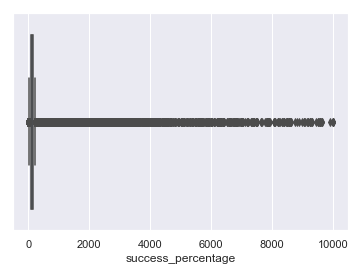

In [29]:
sns.boxplot(x=cleaned_df['success_percentage'])

### Outliers

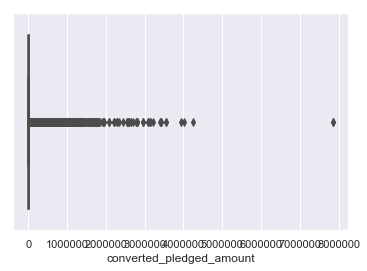

In [30]:
sns.boxplot(x=cleaned_df['converted_pledged_amount'])

In [34]:
cleaned_df['converted_pledged_amount'].value_counts().sort_index()

1           72
2           36
3           22
4            7
5           62
6           34
7           18
8           26
9           19
10         172
11          78
12          35
13          27
14          20
15          88
16          61
17          40
18          32
19          17
20         164
21          81
22          56
23          33
24          31
25         233
26          95
27          35
28          32
29          26
30         132
          ... 
2085491      1
2200642      2
2209270      1
2277182      1
2286193      2
2344134      1
2437429      1
2530756      1
2542045      1
2575192      2
2586421      2
2650310      1
2708472      1
2785537      1
2803249      2
2804475      1
2810127      1
2950874      1
2952508      1
3091488      2
3127299      2
3139558      2
3203762      1
3401361      1
3410084      2
3538065      2
3948547      1
4013731      1
4236618      1
7850866      2
Name: converted_pledged_amount, Length: 27561, dtype: int64

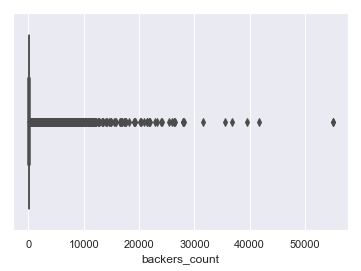

In [31]:
sns.boxplot(x=cleaned_df['backers_count'])

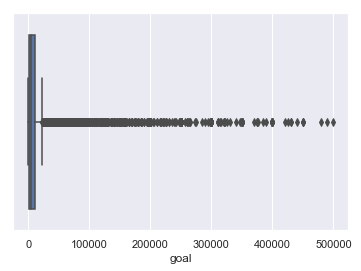

In [32]:
sns.boxplot(x=cleaned_df['goal'])

# Binning

In [18]:
#check range of 'converted_pledged_amount' column

bins = [0, 1, 5, 10, 50, 100, 2500, 5000, 10000, 25000, 50000, 75000, 100000, 1000000, 10000000, 15000000, np.inf]
pledged_bins = pd.cut(cleaned_df['converted_pledged_amount'], bins=bins).value_counts().sort_index()
print (pledged_bins)

(0.0, 1.0]                     72
(1.0, 5.0]                    127
(5.0, 10.0]                   269
(10.0, 50.0]                 2496
(50.0, 100.0]                2623
(100.0, 2500.0]             43714
(2500.0, 5000.0]            18964
(5000.0, 10000.0]           19014
(10000.0, 25000.0]          18044
(25000.0, 50000.0]           6986
(50000.0, 75000.0]           2474
(75000.0, 100000.0]          1031
(100000.0, 1000000.0]        3030
(1000000.0, 10000000.0]       214
(10000000.0, 15000000.0]        4
(15000000.0, inf]               0
Name: converted_pledged_amount, dtype: int64


In [19]:
#check what the 'converted pledged amount' values anove 1,000,000 reveal
print(cleaned_df[cleaned_df['converted_pledged_amount']>1000000]['state'].value_counts())
print('\n')
print('What we find is that all of these outliers are successful - this is obvious since we are looking at money pledged to a campaign \n for the purpose of this project, these outliers will remain in our dataset.')

successful    218
Name: state, dtype: int64


What we find is that all of these outliers are successful - this is obvious since we are looking at money pledged to a campaign 
 for the purpose of this project, these outliers will remain in our dataset.


In [20]:
#check range of 'backers_count' column

bins = [0, 1, 10, 25, 50, 75, 100, 250, 500, 1000, 10000, 50000, 110000, np.inf]
backers_bins = pd.cut(cleaned_df['backers_count'], bins=bins).value_counts().sort_index()
print (backers_bins)

(0.0, 1.0]              1580
(1.0, 10.0]            16358
(10.0, 25.0]           18784
(25.0, 50.0]           21413
(50.0, 75.0]           14228
(75.0, 100.0]           9223
(100.0, 250.0]         21612
(250.0, 500.0]          8044
(500.0, 1000.0]         4030
(1000.0, 10000.0]       3631
(10000.0, 50000.0]       150
(50000.0, 110000.0]        9
(110000.0, inf]            0
Name: backers_count, dtype: int64


In [21]:
#check what the 'converted pledged amount' values above 10,000 reveal
print(cleaned_df[cleaned_df['backers_count']>10000]['state'].value_counts())
print('\n')
print('Since this row shows the number of backers for each campaign, it makes sense that the higher the number \n the more successful the campaign is, therefore we will keep these outliers')

successful    159
Name: state, dtype: int64


Since this row shows the number of backers for each campaign, it makes sense that the higher the number 
 the more successful the campaign is, therefore we will keep these outliers


In [22]:
#check range of 'goal' column
bins = [0, 1.5, 2, 5, 10, 50, 100, 2500, 5000, 10000, 25000, 50000, 75000, 100000, 500000, 1000000, 10000000, 100000000, np.inf]
goal_bins = pd.cut(cleaned_df['goal'], bins=bins).value_counts().sort_index()
print (goal_bins)

(0.0, 1.5]                     187
(1.5, 2.0]                       8
(2.0, 5.0]                      48
(5.0, 10.0]                    190
(10.0, 50.0]                   805
(50.0, 100.0]                 1620
(100.0, 2500.0]              43743
(2500.0, 5000.0]             24579
(5000.0, 10000.0]            21026
(10000.0, 25000.0]           16851
(25000.0, 50000.0]            6924
(50000.0, 75000.0]            1297
(75000.0, 100000.0]            988
(100000.0, 500000.0]           742
(500000.0, 1000000.0]           40
(1000000.0, 10000000.0]         13
(10000000.0, 100000000.0]        0
(100000000.0, inf]               0
Name: goal, dtype: int64


In [23]:
#check what the 'goal' values above 1,000,000 reveal- are the campaigns mostly failures?
print(cleaned_df[cleaned_df['goal']>1000000]['state'].value_counts())
print('\n')
print('Clearly these are outliers and by looking at the rows and their [state] we can justify their removal from our data \n most of these campaigns are successful and must be sacrificed to maintain model accuracy.')


successful    8
failed        5
Name: state, dtype: int64


Clearly these are outliers and by looking at the rows and their [state] we can justify their removal from our data 
 most of these campaigns are successful and must be sacrificed to maintain model accuracy.


##### Let's check what other 'goal' bins reveal about the campaigns 'state'

In [24]:
#check what the 'goal' values above 500,000 reveal
print(cleaned_df[cleaned_df['goal']>500000]['state'].value_counts())
print('\n')
print('These values are outliers and will be removed from our dataset as they would affect our modelling accuracy')


successful    28
failed        25
Name: state, dtype: int64


These values are outliers and will be removed from our dataset as they would affect our modelling accuracy


##### Let's remove outliers that have a goal above 500,000

In [25]:
#drop rows with a goal above 500,000
cleaned_df.drop(cleaned_df[cleaned_df['goal'] >= 500000 ].index , inplace=True)

cleaned_df.shape

(118985, 22)

### Histograms

In [26]:
#plotting our histogram
numeric_df.converted_pledged_amount.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Pledge Amount by No. of Backers')
plt.ylabel('Pledge Amount')
plt.xlabel('No. of Backers');

NameError: name 'numeric_df' is not defined

### Heat map

In [ ]:
plt.figure(figsize=(20,10))
c = cleaned_df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

### Scatter plot

In [ ]:
#plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(numeric_df['backers_count'], numeric_df['goal'])
ax.set_xlabel('No. of Backers')
ax.set_ylabel('Goal')
plt.show()

In [ ]:
numeric_df['backers_count'].value_counts()

google scholar:


https://towardsdatascience.com/using-machine-learning-to-predict-kickstarter-success-e371ab56a743

https://towardsdatascience.com/predicting-the-success-of-kickstarter-campaigns-3f4a976419b9

https://thehustle.co/archive/02102019d/

https://www.theverge.com/2019/11/19/20971432/kickstarter-project-budget-funding-calculator-campaign-backers

